In [1]:
# 設定所需 library
import numpy as np 
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.optimizers import SGD, Adam 
from keras.utils import np_utils 
from keras.datasets import mnist
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
# categorical_crossentropy
def load_data():
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    number = 10000
    x_train = x_train[0:number]
    y_train = y_train[0:number]
    x_train = x_train.reshape(number, 28 * 28)
    x_test = x_test.reshape(number, 28 * 28)
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
# convert class vectors to binary class matrices 
    y_train = np_utils.to_categorical(y_train, 10)
    y_test = np_utils.to_categorical(y_test, 10)
    x_train = x_train
    x_test = x_test
# x_test=np.random.normal(x_test)
    x_train = x_train/255
    x_test = x_test/255
    return (x_train, y_train), (x_test, y_test)

def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()       

Train on 8000 samples, validate on 2000 samples
Epoch 1/20
8000/8000 [==============================] - 2s 247us/step - loss: 0.9917 - acc: 0.6744 - val_loss: 0.3537 - val_acc: 0.8985
Epoch 2/20
8000/8000 [==============================] - 2s 212us/step - loss: 0.3822 - acc: 0.8845 - val_loss: 0.2829 - val_acc: 0.9140
Epoch 3/20
8000/8000 [==============================] - 2s 213us/step - loss: 0.2748 - acc: 0.9166 - val_loss: 0.2453 - val_acc: 0.9225
Epoch 4/20
8000/8000 [==============================] - 2s 214us/step - loss: 0.2288 - acc: 0.9315 - val_loss: 0.2141 - val_acc: 0.9375
Epoch 5/20
8000/8000 [==============================] - 2s 212us/step - loss: 0.1876 - acc: 0.9449 - val_loss: 0.2245 - val_acc: 0.9370
Epoch 6/20
8000/8000 [==============================] - 2s 210us/step - loss: 0.1636 - acc: 0.9520 - val_loss: 0.2137 - val_acc: 0.9410
Epoch 7/20
8000/8000 [==============================] - 2s 216us/step - loss: 0.1492 - acc: 0.9540 - val_loss: 0.1954 - val_acc: 0.9460


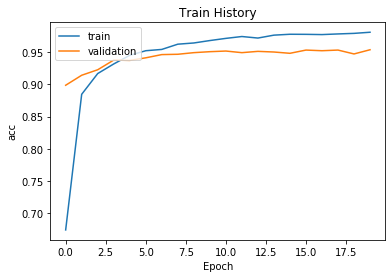

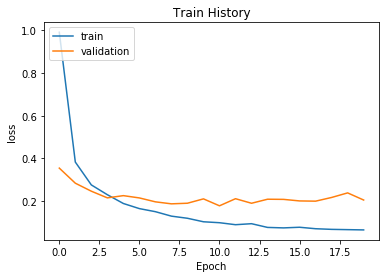

In [7]:

(x_train, y_train), (x_test, y_test) = load_data()
 # define network structure
model = Sequential()
model.add(Dense(input_dim=28*28, units=500, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=500, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=500, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=10, activation='softmax'))
    
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['acc'])
train_history = model.fit(x_train, y_train, batch_size=100, epochs=20,validation_split=0.2)
    
result = model.evaluate(x_train, y_train)
print('Train Accuracy:', result[1])
result = model.evaluate(x_test, y_test)
print('Test Accuracy:', result[1])
    
show_train_history(train_history, 'acc', 'val_acc')
show_train_history(train_history, 'loss', 'val_loss')


In [17]:
import PIL
from PIL import Image
image = PIL.Image.open(r"C:\Users\user\Desktop\a.jpg")   #500*500 的大小
image = image.resize((28,28))
image.show()
img_array=np.asarray(image,dtype=np.float32) 
def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray
img_array = rgb2gray(img_array)
img_array= np.ravel(img_array)
img_array = np.expand_dims(img_array, axis=0)
a = model.predict(img_array)
arr_aa = np.array(a)
print(arr_aa)
maxindex  = np.argmax(arr_aa)
print('your photo is : ',str(maxindex))


[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
your photo is :  7


In [22]:
# overfitting what the fuck
# Dropout and use 'relu' and 'adam'
from keras.models import load_model
# creates a HDF5 file 
model.save('overfitting_FNN.h5')

In [23]:
if load_model('overfitting_FNN.h5'):
    print('Yeee~')

Yeee~
